In [1]:
import matplotlib.pyplot as plt
import mglearn
import mglearn.datasets
import numpy as np



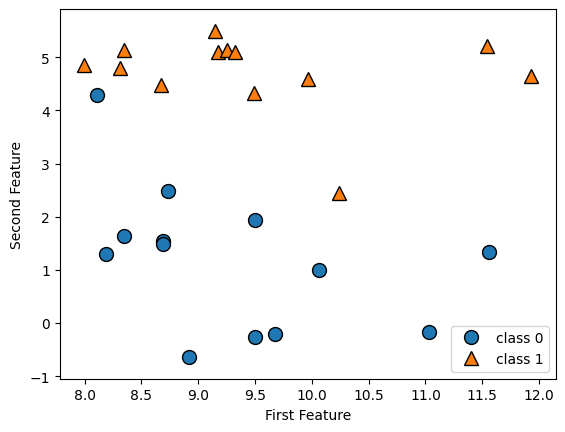

In [ ]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.show()


Text(0, 0.5, 'Target')

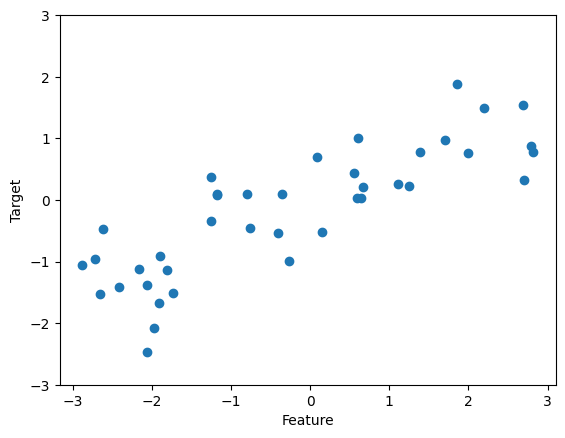

In [3]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("{}".format(cancer.keys()))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("shape of cancer data: {}".format(cancer.data.shape))

shape of cancer data: (569, 30)


In [12]:
print("sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [13]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Problem: boston housing dataset is to predict the median value of homes in several boiston neighborhoods in the 1970s
this dataset is taken out from Scikit due to an ethical issue.
We will look into Knn Algo:


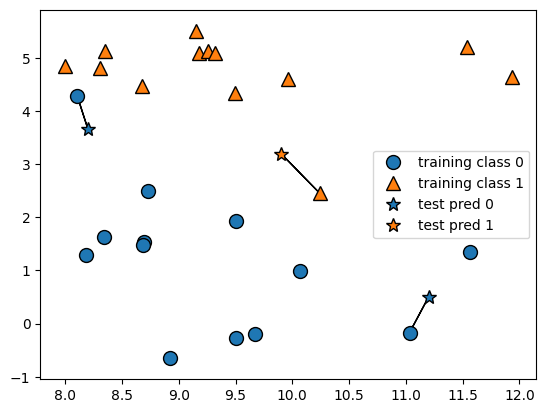

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

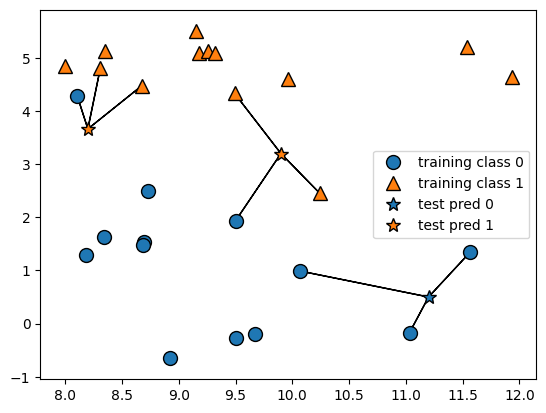

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [46]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_trian, X_test, y_train,y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_trian,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
print("Prediction of test Set \n{}".format(clf.predict(X_test)))

Prediction of test Set 
[1 0 1 0 1 0 0]


In [48]:
print("Test Accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test Accuracy: 0.86


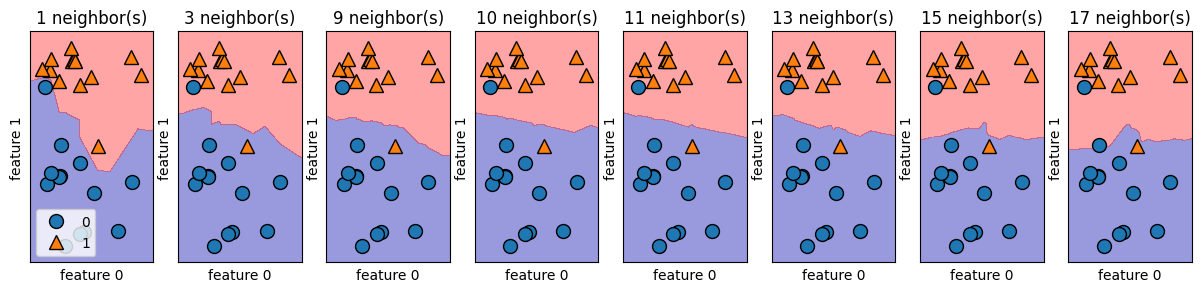

In [61]:
fig, axes = plt.subplots(1,8,figsize=(15,3))

for n_ne, ax in zip([1,3,9,10,11,13,15,17], axes):
    clf=KNeighborsClassifier(n_neighbors=n_ne).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_ne))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)





Optimum Neighbors are around 10-11 as we go above that the decision boundary again starts to change pattern from smooth to distorted around the test points
 We shall now perform a tasj for cancer dataset
 

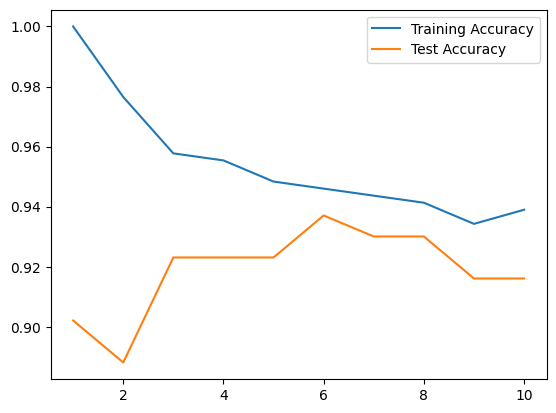

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target,random_state=66)
training_accuracy =[]
test_accuracy =[]
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #building the model
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label="Training Accuracy")
plt.plot(neighbors_settings,test_accuracy,label="Test Accuracy")
plt.ylabel="Accuracy"
plt.xlabel="n_neighbors"
plt.legend()

TypeError: 'str' object is not callable

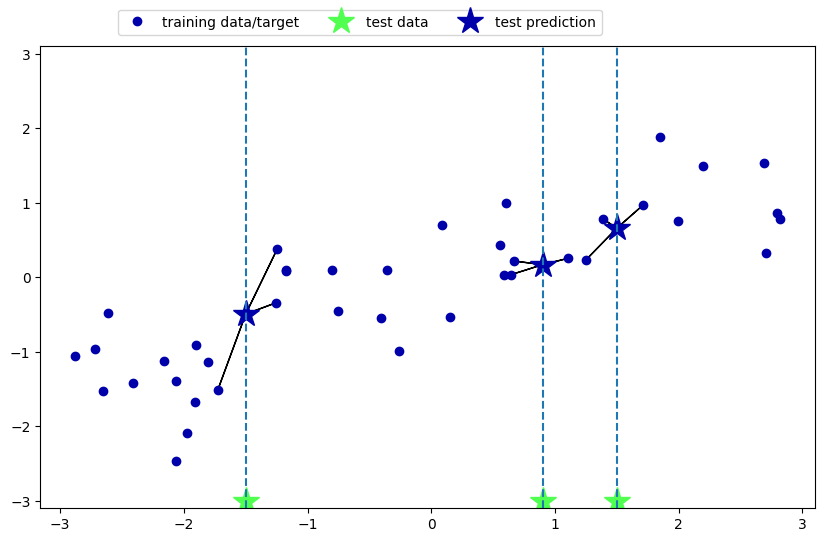

In [73]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [83]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [84]:
print("Prediction : {}".format(reg.predict(X_test)))
print(reg.score(X_test,y_test))


Prediction : [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


0.8344172446249606

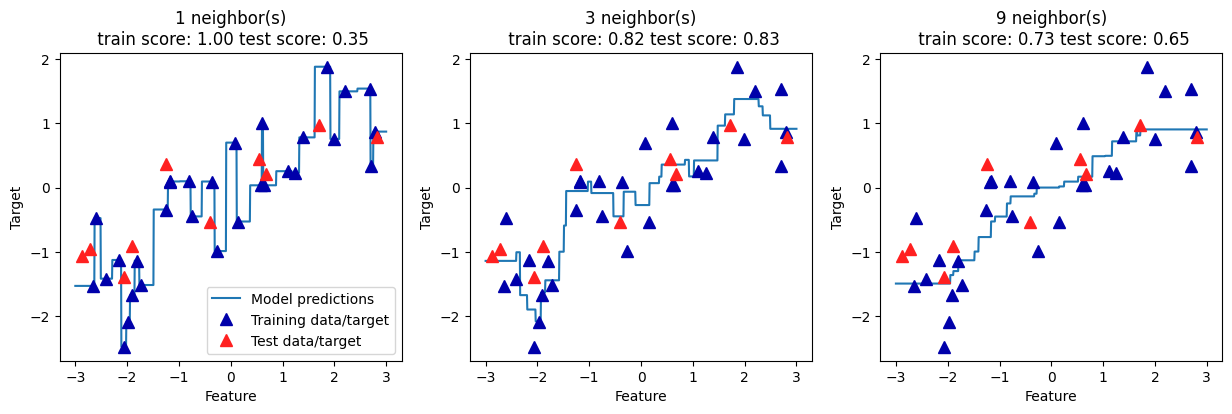

In [86]:
fig, axes =plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'^',c=mglearn.cm2(1),markersize=8)

    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"],loc="best")

w[0]: 0.393906  b: -0.031804


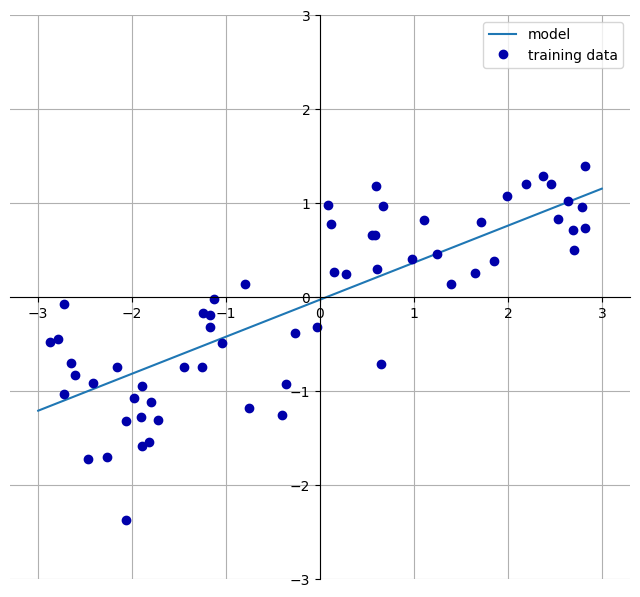

In [87]:
mglearn.plots.plot_linear_regression_wave()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr =LinearRegression().fit(X_train,y_train)

In [9]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759704


In [10]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6700890315075756
0.6593368596863702


Both training set score and test set score are close to eachother this means they are overfitting


In [13]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [14]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9520519609032728
0.6074721959666127


since the extended boston data set is complex and our score for training is higher then testing this suggest its overfitting

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("{:.2f}".format(ridge.score(X_train,y_train)))
print(ridge.score(X_test,y_test))

0.89
0.7527683481744757


note that the ridge model performs better with test data and training data. 
This is beacuse it explicitly restricts the dataset to avoid overfitting
A less complex model means worse performance on training set but better generalization.



In [18]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.7882787115369616
0.6359411489177312
0.9282273685001988
0.7722067936479813


increasing the Alpha parameter means the coeffiecnt moves towards zero and thus are score becomes more like linear regeression and decreasing the performance
where as if we keep the Alpha value lower 0.1 we see better performance for now 0.1 seems to performing well we can decrease it to see of the outcome but lets now plot it out.


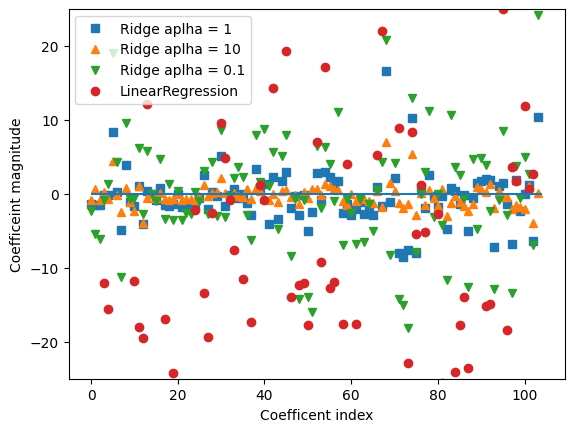

In [21]:
plt.plot(ridge.coef_,'s',label="Ridge aplha = 1")
plt.plot(ridge10.coef_,'^',label="Ridge aplha = 10")
plt.plot(ridge01.coef_,'v',label="Ridge aplha = 0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficent index")
plt.ylabel("Coefficeint magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()


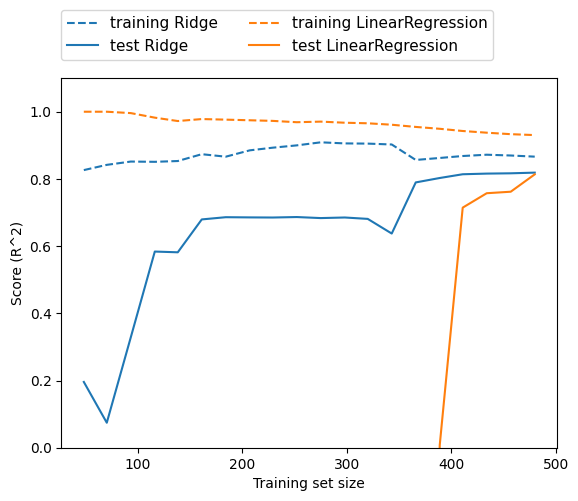

In [22]:
mglearn.plots.plot_ridge_n_samples()

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print(np.sum(lasso.coef_!=0))

0.29323768991114607
0.20937503255272294
4


0.89622265110865
0.7656571174549982
33
0.9507158754515462
0.6437467421273346
96


Text(0, 0.5, 'Coefficient Magnitude')

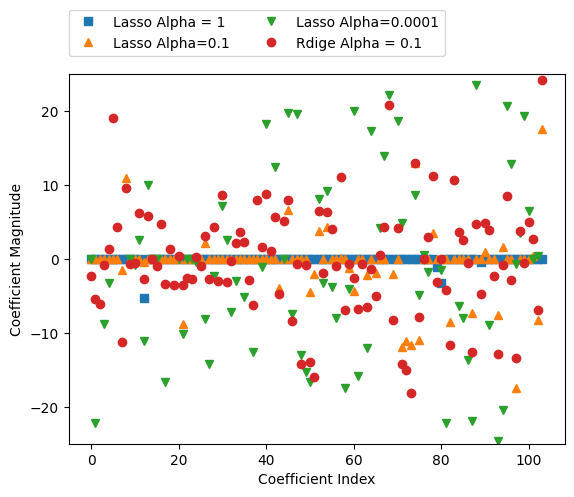

In [26]:
lasso01 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print(lasso01.score(X_train,y_train))
print(lasso01.score(X_test,y_test))
print(np.sum(lasso01.coef_!=0))

lasso0001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print(lasso0001.score(X_train,y_train))
print(lasso0001.score(X_test,y_test))
print(np.sum(lasso0001.coef_!=0))

plt.plot(lasso.coef_,'s',label="Lasso Alpha = 1")
plt.plot(lasso01.coef_,'^',label="Lasso Alpha=0.1")
plt.plot(lasso0001.coef_,'v',label="Lasso Alpha=0.0001")
plt.plot(ridge01.coef_,'o',label="Rdige Alpha = 0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")

In [36]:
from sklearn.datasets import load_diabetes
boston = load_diabetes()
print(boston.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [40]:
print(boston.data.shape)

(442, 10)


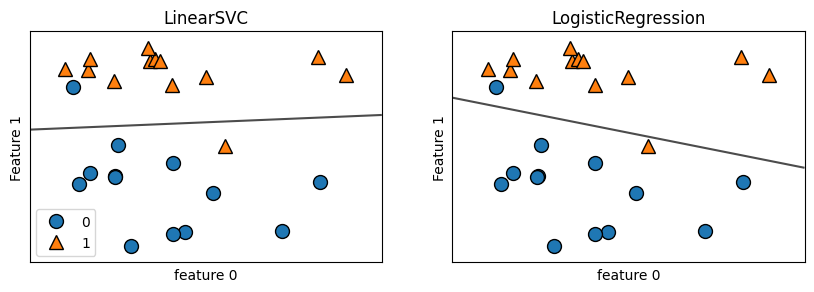

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


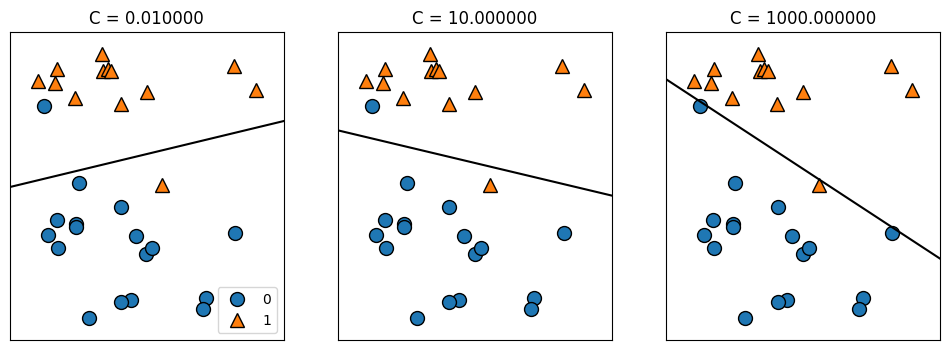

In [45]:
mglearn.plots.plot_linear_svc_regularization()